In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
# OpenCV
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
# from google.colab import drive

# Accessing My Google Drive
# drive.mount('/content/drive')

In [16]:
from skimage import io
img = io.imread("https://images.unsplash.com/photo-1514565131-fce0801e5785?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MXx8Y2l0eXNjYXBlfGVufDB8fDB8&ixlib=rb-1.2.1&w=1000&q=80")

In [19]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

In [31]:
# Preprocessing
def processing(img):
    
    # Reading 3 images to work
#     img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
#     try:
#         print('Original size',img[0].shape)
#     except AttributeError:
#         print("shape not found")
   
#     # --------------------------------
#     # setting dim of the resize
#     height = 220
#     width = 220
#     dim = (width, height)
#     res_img = []
#     for i in range(len(img)):
#         res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
#         res_img.append(res)

#     # Checcking the size
#     try:
#         print('RESIZED', res_img[1].shape)
#     except AttributeError:
#         print("shape not found")
    
    
#     # Visualizing one of the images in the array
    original = img
    display_one(original)
    # ----------------------------------
    # Remove noise
    # Using Gaussian Blur

  
    blur = cv2.GaussianBlur(img, (5, 5), 0)



    image = blur
    display(original, image, 'Original', 'Blured')
    #---------------------------------
    # Segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Displaying segmented images
    display(original, thresh, 'Original', 'Segmented')
    # Further noise removal (Morphology)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    #Displaying segmented back ground
    display(original, sure_bg, 'Original', 'Segmented Background')

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]

    # Displaying markers on the image
    display(original, markers, 'Original', 'Marked')

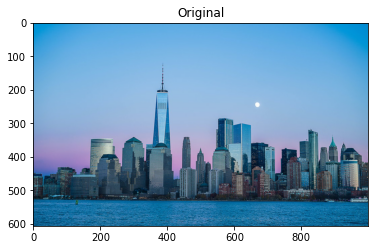

TypeError: Invalid shape (1, 607, 1000, 3) for image data

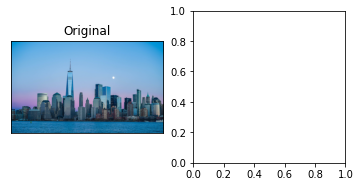

In [32]:
processing(img)